In [9]:
# Loading libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [10]:
# Loading data
path = os.getcwd()

In [11]:
df_complaints = pd.read_csv(os.path.join(path, 'BPI2016_Complaints.csv'), sep=";", encoding='latin-1')

In [12]:
# Change format
df_complaints['ContactDate'] = pd.to_datetime(df_complaints['ContactDate'], format='%Y-%m-%d')

In [13]:
# Create new column
df_complaints['Month'] = df_complaints['ContactDate'].dt.strftime('%m')

In [14]:
# Keeping the top 5 most complaining customers
df_complaints = df_complaints.loc[df_complaints['CustomerID'].isin([1202227,1373382,2016564,2060596,1604792])]
df_complaints.head()

,CustomerID,AgeCategory,Gender,Office_U,Office_W,ComplaintDossierID,ComplaintID,ContactDate,ContactChannelID,ComplaintThemeID,ComplaintSubthemeID,ComplaintTopicID,ComplaintTheme,ComplaintSubtheme,ComplaintTopic,ComplaintTheme_EN,ComplaintSubtheme_EN,ComplaintTopic_EN,Month
4,1202227,30-39,V,280,283,3,6,2015-07-07,5,3,4,2,dienstverlening,informatie / communicatie naar de klant,"(meerdere) verzoeken, te weinig resultaat",services,information/communication to the customer,"(Multiple) requests, to little avail",07
5,2016564,40-49,V,238,241,5,9,2015-07-09,8,3,4,2,dienstverlening,informatie / communicatie naar de klant,"(meerdere) verzoeken, te weinig resultaat",services,information/communication to the customer,"(Multiple) requests, to little avail",07
6,2060596,50-65,M,313,318,20,25,2015-08-18,8,3,4,2,dienstverlening,informatie / communicatie naar de klant,"(meerdere) verzoeken, te weinig resultaat",services,information/communication to the customer,"(Multiple) requests, to little avail",08
58,1604792,50-65,V,257,291,78,91,2015-10-23,8,3,1,16,dienstverlening,begeleiding / behandeling,geen interne communicatie / overdracht gegevens,services,support/handling,no internal communication/data transfer,10
69,2060596,50-65,M,313,318,38,48,2015-09-17,8,2,5,20,bejegening (houding / gedrag),n.v.t.,geen respect / niet serieus genomen,treatment (attitude/behavior),N.A.,no respect/not taken seriously,09


In [15]:
#Group by complaints
counts_type_complaints = df_complaints.groupby(['ComplaintTopic_EN']).count().unstack()
type_complaints = counts_type_complaints.CustomerID

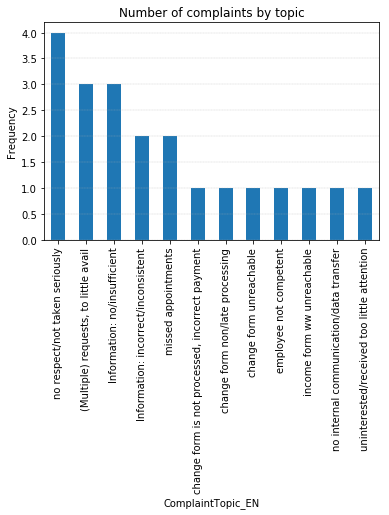

In [16]:
ax = type_complaints.sort_values(ascending = False).plot(kind='bar',stacked = False, colormap='tab20')

plt.xticks(rotation = 90)
plt.ylabel ('Frequency')
plt.title('Number of complaints by topic')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.3)
plt.show()

In [17]:
# Group by Month and Gender
counts = df_complaints.groupby(['Month', 'Gender']).count().unstack()
counts.CustomerID

Gender,M,V
Month,,
07,NaN,7.0
08,2.0,NaN
09,2.0,NaN
10,NaN,8.0
11,NaN,1.0
12,NaN,1.0


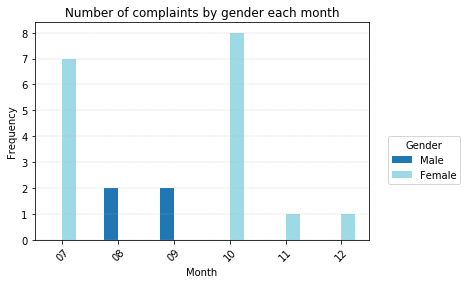

In [18]:
ax = counts.CustomerID.plot(kind='bar',stacked = False, colormap='tab20')

plt.xlabel ('Month')
plt.xticks(rotation = 45)
plt.ylabel ('Frequency')
plt.title('Number of complaints by gender each month')
plt.legend(title='Gender', bbox_to_anchor=(1.04, 0.5), loc="upper left", labels=['Male', 'Female'])
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.3)
plt.show()

In [19]:
# Group by Month and Age Category
counts_age = df_complaints.groupby(['Month', 'AgeCategory']).count().unstack()
counts_age.CustomerID

AgeCategory,30-39,40-49,50-65
Month,,,
07,5.0,2.0,NaN
08,NaN,NaN,2.0
09,NaN,NaN,2.0
10,2.0,2.0,4.0
11,1.0,NaN,NaN
12,1.0,NaN,NaN


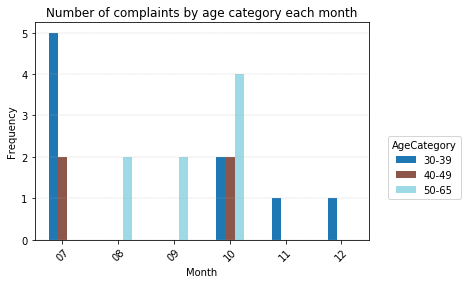

In [20]:
ax = counts_age.CustomerID.plot(kind='bar',stacked = False, colormap='tab20')

plt.xlabel ('Month')
plt.xticks(rotation = 45)
plt.ylabel ('Frequency')
plt.title('Number of complaints by age category each month')
plt.legend(title='AgeCategory', bbox_to_anchor=(1.04, 0.5), loc="upper left", labels=['30-39', '40-49', '50-65', '50-65'])
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.3)
plt.show()